In [1]:
import nbsetup
import numpy as np
import pandas as pd
import seaborn as sns
from helpers import entropy

https://www.youtube.com/watch?v=LGqOH3sYmQA

[None]

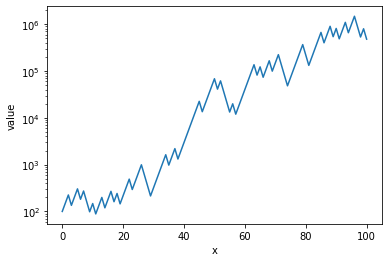

In [2]:
ensembles = 1
timesteps = 100

data = {'x': np.arange(timesteps+1)}
for i in range(ensembles):
    series = [100]
    for t in range(timesteps):
        if np.random.choice([True, False]):
            s = series[t]*1.5
        else:
            s = series[t]*0.6
        series.append(s)
    data[i] = np.array(series)

df = pd.DataFrame(data)
g = sns.lineplot(x='x', y='value', ci=None, hue='variable', data=df.melt(id_vars=['x']), legend=0)
g.set(yscale='log')

In [3]:
# Standardise 
MAX = 20
ENSEMBLES = 7
OBS = 10000

def gen_ee(func):
    data = []
    for i in range(ENSEMBLES):
        row = func()
        data.append(row)
    data = np.array(data)
    ee = entropy.ErgodicEnsemble(observations=data, bins=np.arange(data.max()+2))
    return ee

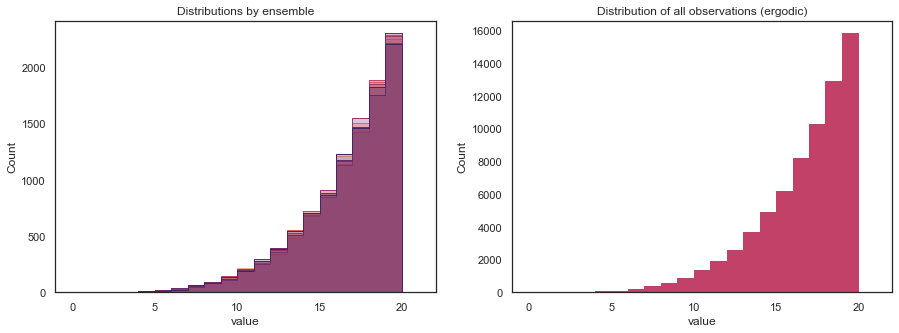

In [4]:
eep = gen_ee(lambda: np.random.power(5,OBS)*MAX)
eep.plot()

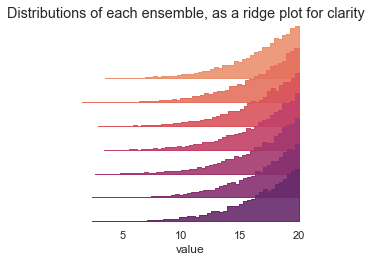

In [5]:
eep.plot(ridge=True)

In [6]:
eep.stats()

Ensembles count: 7
Ergodic entropy: 3.157
Average ensemble entropy: 3.156
Ergodic Complexity: 0.001



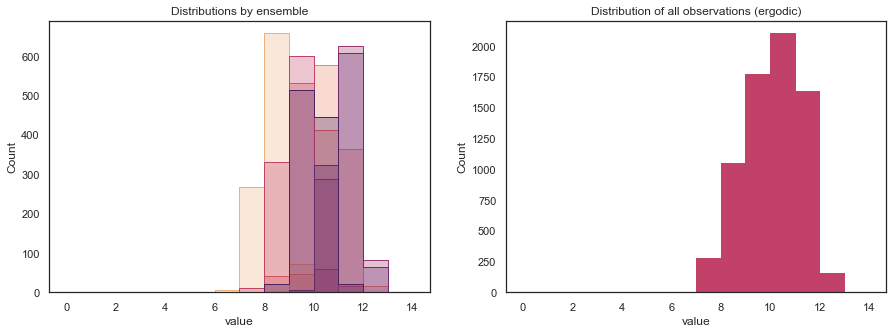

In [7]:
def uni_data():
    mu = np.random.normal(MAX/2, 1)
    return np.random.normal(mu, 0.5, 1000)

eeu = gen_ee(uni_data)
eeu.plot()

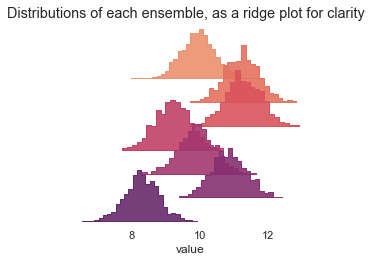

In [8]:
eeu.plot(ridge=True)

In [9]:
eeu.stats()

Ensembles count: 7
Ergodic entropy: 2.240
Average ensemble entropy: 1.268
Ergodic Complexity: 0.971



In [10]:
np.random.seed

<function RandomState.seed>

In [11]:
eep.geometric_ensemble_mean - eep.ensemble

-1.530011982531221e-05